# Market Analysis of Current Cars


Importing the necessary libraries to perform market segmentation

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [4]:
df=pd.read_csv("Downloads\cars_ds_final.csv")

In [6]:
df.sample(10)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,...,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
607,607,Volkswagen,Vento,Highline Plus 1.2 (P) Dsg,"Rs. 14,49,500",1197 cc,4.0,2.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,55 litres,Petrol,1467 mm,4390 mm,1699 mm,Sedan,4.0,...,Cup Holders,NaN,Yes,Yes,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
989,989,Nissan,Terrano,Xv D Premium 110 Ps,"Rs. 14,19,900",1461 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,50 litres,Diesel,1671 mm,4331 mm,1822 mm,SUV,5.0,...,Cup Holders,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
740,740,Honda,Civic,1.8 V Cvt,"Rs. 17,93,900",1799 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,47 litres,Petrol,1433 mm,4656 mm,1799 mm,Sedan,4.0,...,Cup Holders,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158,1158,Bmw,6-Series,630I Gt Luxury Line,"Rs. 64,40,000",4395 cc,8.0,4.0,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,70 litres,Petrol,1369 mm,4894 mm,1894 mm,Coupe,2.0,...,NaN,NaN,NaN,NaN,NaN,Only front,NaN,NaN,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1266,1266,Honda,City,V Mt Petrol,"Rs. 10,65,900",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,40 litres,Petrol,1495 mm,4440 mm,1695 mm,Sedan,4.0,...,Cup Holders,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
369,369,Maruti Suzuki,S-Presso,Lxi,"Rs. 4,09,000",998 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,27 litres,Petrol,1549 mm,3565 mm,1520 mm,Hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,205,Toyota,Platinum Etios,Vx Limited Edition,"Rs. 8,03,400",1496 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Longitudinal",Injection,45 litres,Petrol,1510 mm,4369 mm,1695 mm,Sedan,4.0,...,Yes,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,819,Land Rover Rover,Range Velar,2.0 Diesel R-Dynamic S,"Rs. 72,46,802",1999 cc,4.0,4.0,4WD,In-line,BS IV,"Front, Longitudinal",Injection,NaN,Diesel,1665 mm,4797 mm,2145 mm,SUV,5.0,...,NaN,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
905,905,Maruti Suzuki,Baleno,1.2 Alpha Cvt,"Rs. 8,90,212",1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Transverse",Injection,37 litres,Petrol,1510 mm,3995 mm,1745 mm,Hatchback,5.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,243,Honda,Cr-V,2Wd Petrol Cvt,"Rs. 28,27,001",1997 cc,4.0,NaN,FWD (Front Wheel Drive),In-line,NaN,"Front, Transverse",Injection,57 litres,Petrol,1679 mm,4592 mm,1855 mm,SUV,5.0,...,Cup Holders,Yes,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1276.000000,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,637.500000,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,368.493781,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,318.750000,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,637.500000,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,956.250000,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,1275.000000,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [10]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Data Chararcteristics",
    xaxis_title="",
    yaxis_title="Count",
    font=dict(
        size=16,
    )
)

fig.show()

In [15]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

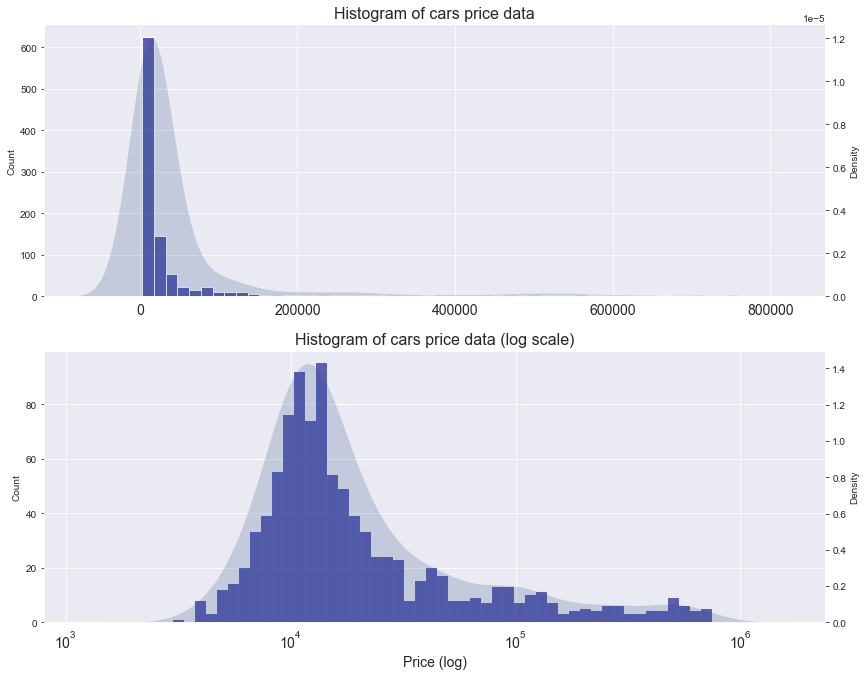

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

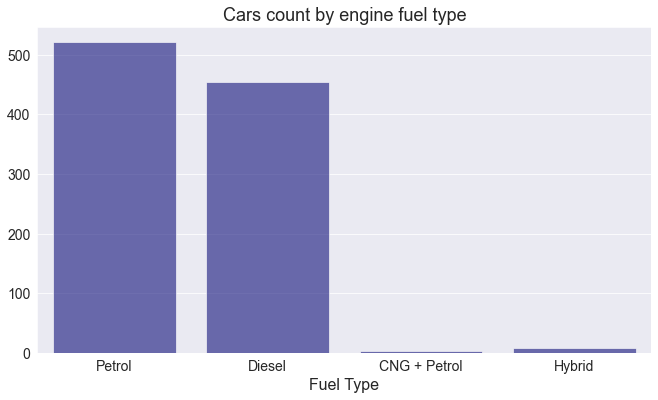

In [17]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

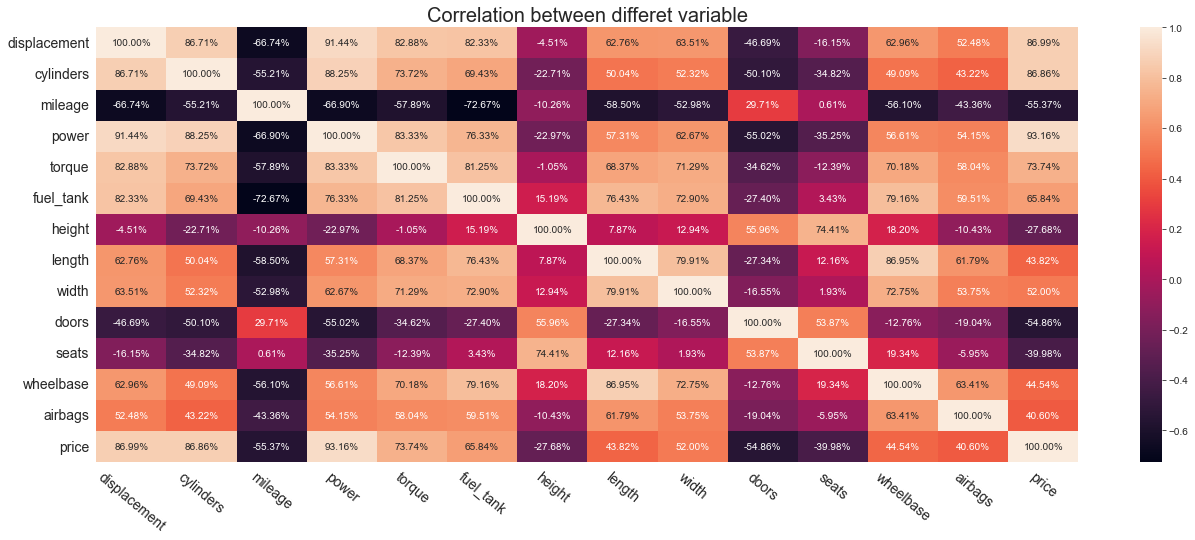

In [18]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

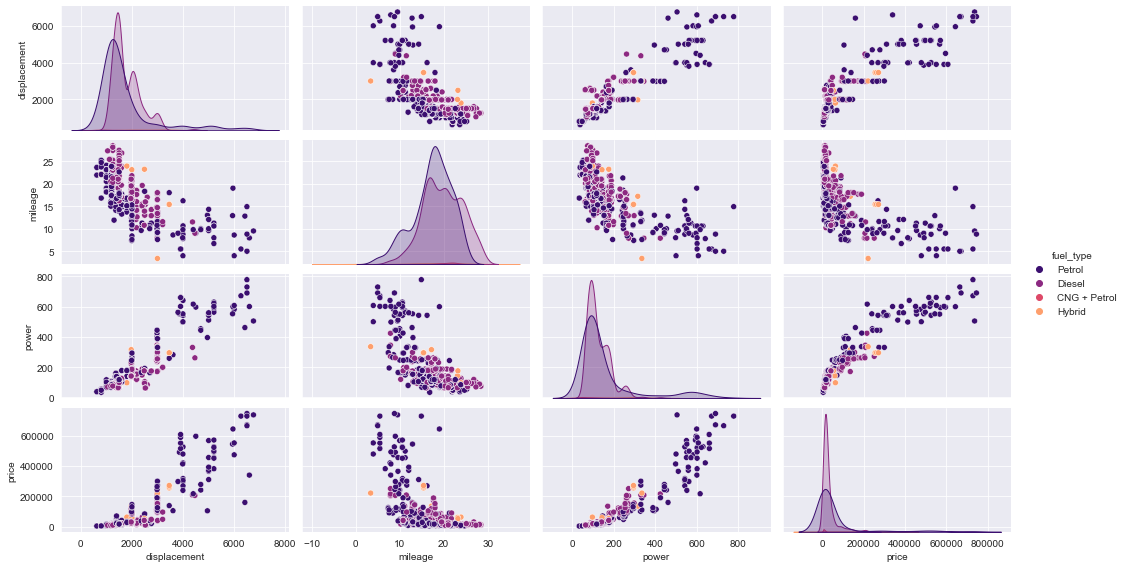

In [26]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

In [19]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

Performing KMeans Clustering in order to identify the same type of cars

In [20]:
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
153,Maruti Suzuki,Dzire,Maruti Suzuki Dzire,Lxi,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,22.00,82.85,115,37.0,1515.0,3995.0,1735.0,4,5,2450.0,2,8156,1
1068,Hyundai,Grand I10 Nios,Hyundai Grand I10 Nios,Asta 1.2 Vtvt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,4,20.70,81.86,114,37.0,1520.0,3805.0,1680.0,5,5,2450.0,2,10065,1
32,Maruti Suzuki,Alto K10,Maruti Suzuki Alto K10,Vxi (O),Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),998,3,24.07,67.07,90,35.0,1460.0,3620.0,1475.0,5,5,2360.0,1,5701,1
1154,Bmw,5-Series,Bmw 5-Series,530D M Sport,Sedan,Diesel,Injection,Automatic,RWD (Rear Wheel Drive),2993,6,14.69,254.47,560,70.0,1464.0,4907.0,1860.0,4,5,2968.0,8,93520,4
698,Toyota,Innova Crysta,Toyota Innova Crysta,2.4 Vx 7 Str,MUV,Diesel,Injection,Manual,RWD (Rear Wheel Drive),2393,4,15.00,147.95,343,55.0,1795.0,4735.0,1830.0,5,7,2750.0,3,26978,1


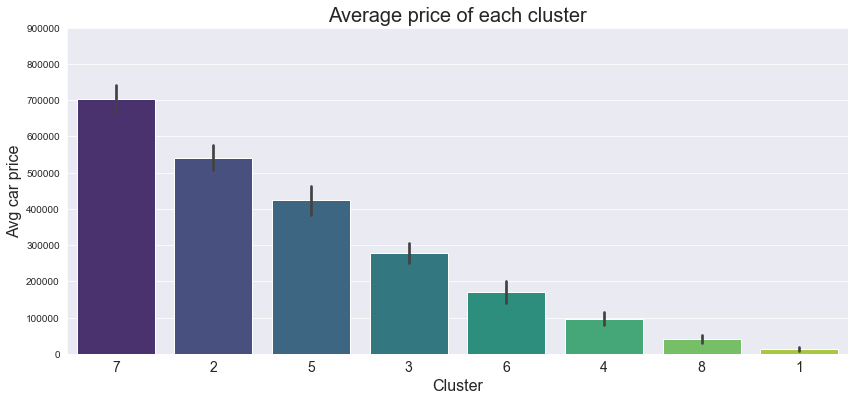

In [25]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x= 'cluster', ci= 'sd', y= 'price', palette='viridis',order=df.groupby('cluster')['price'].mean().sort_values(ascending=False).index);
plt.yticks([i for i in range(0,1000000,100000)])
plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=14);